## Final Project Submission

Please fill out:
Student name: 
* Sharon Atieno
* Agape Gichuki
* Sharon Chelangat
* Taylor Musa
* Brian Chabari
* Chistine Shamwama 
             
Student pace: Full Time

Instructor name: Nikita Njoroge, Lucille Kaleha, Samuel Karu 

## Business Overview


## Business Understanding

The real estate agency needs to provide homeowners with accurate and reliable information about the potential increase in home value due to different factors. We will use the King County House Sales dataset to analyze the factors that lead to the change in home value.The analysis is to help them understand and predict the real estate industry . 


## Problem Statement 
As data scientist we have been tasked by a real estate agency to assess the factors that affect the selling price of houses from a dataset that contains data of houses sold in King County, Washington, USA between May 2014 and May 2015.


## Objectives

*  Predicting house prices: To develop a model that can accurately predict the sale price of a house based on its features, such as square footage, number of bedrooms, number of bathrooms, house design and the overall condition of the house. 

* Identifying the most important features: To determine which features have the greatest impact on house prices, and use this information to help homeowners make decisions about the condition of homes they would like to purchase.
 
* Understanding the market: To gain insights into the real estate market in King County, such as which areas have the highest and lowest average prices, and which types of homes are in the greatest demand.

* Evaluating model performance: Evaluate the performance of different linear regression models using metrics such as R-squared, mean squared error, and root mean squared error, and identify the best-performing model.
* To provide homeowners with accurate and reliable information about the potential increase in home value due to different factors.



## Data Understanding

In [77]:
# loading relevant libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

## Loading The Dataset 

In [78]:
# loading our data

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [80]:
# descriptive analysis of our  numeric variable 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation & Cleaning

### Missing Values 


In [81]:
#checking for missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [82]:
# dropping missing values 

df.dropna(inplace=True)

df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicates 

In [83]:
# checking for duplicatas

df.duplicated().sum()

0

### Changing Grade from Str to Int

In [84]:
df['grade'] = df['grade'].astype(str).str[:1].astype(int)

### Outliers


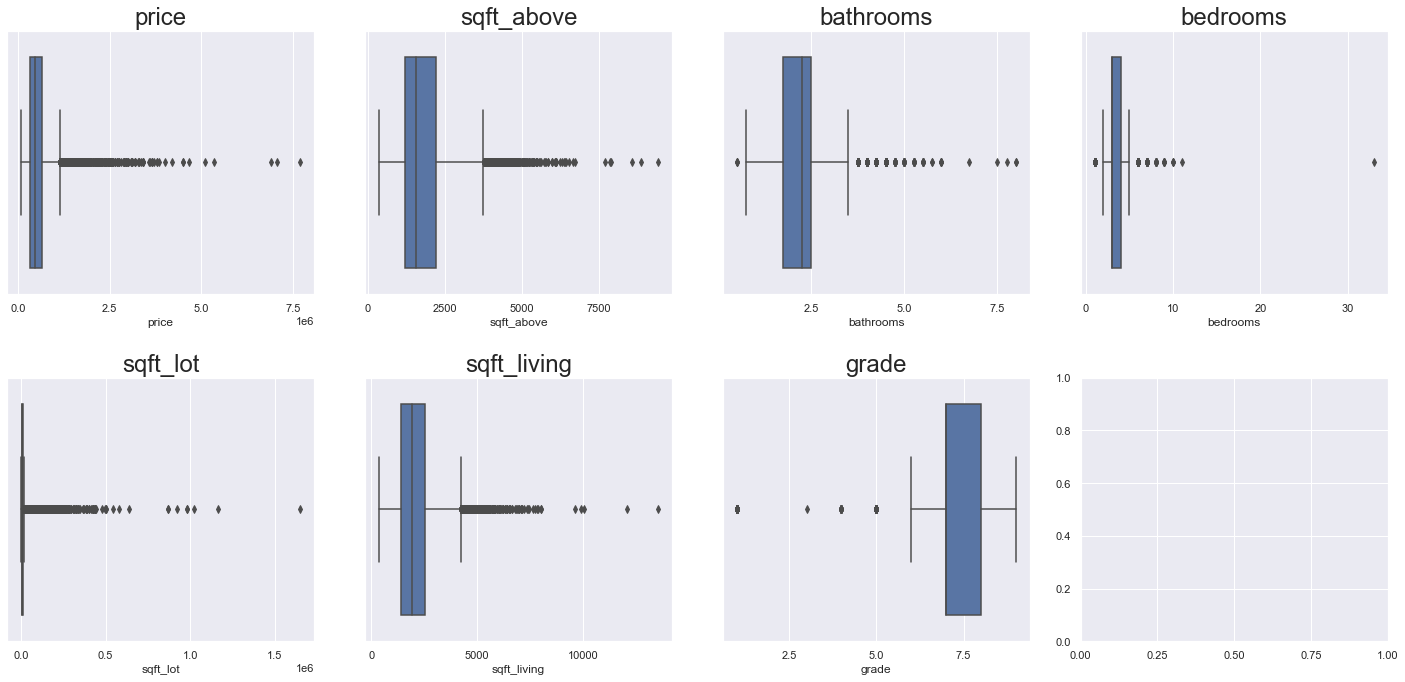

In [85]:
# function to visualize outliers 

def plot_boxplots(df, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):
        # convert the x-axis variable to a numeric data type
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = ['price', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade']

# call the plot_boxplots function

plot_boxplots(df, cols)



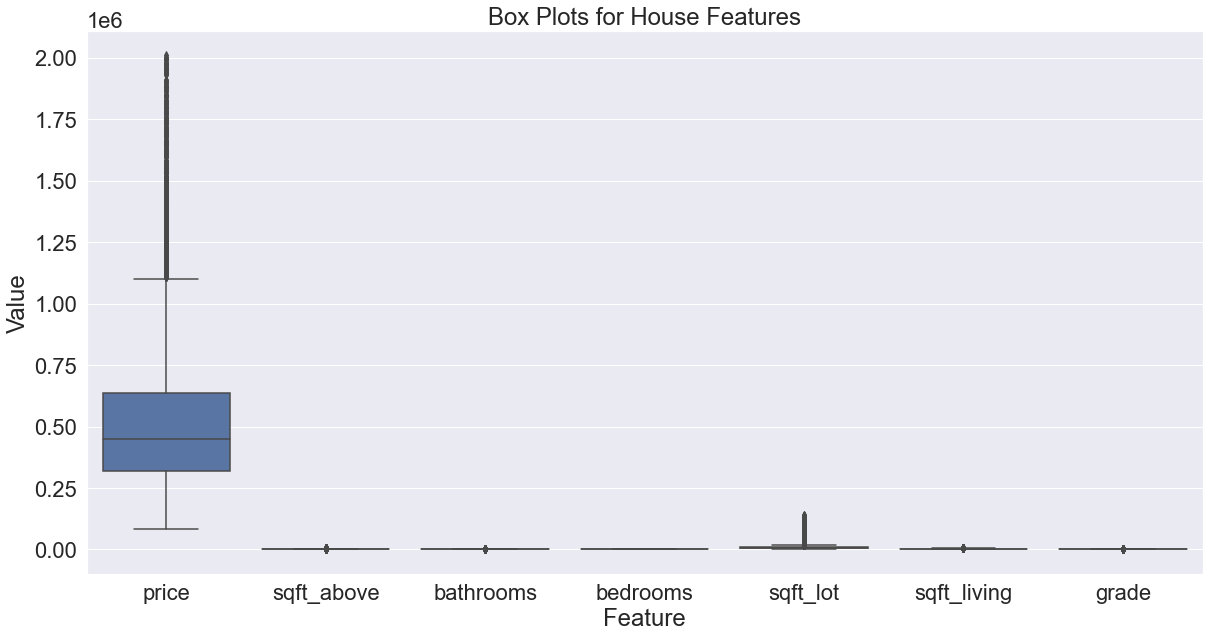

In [86]:

# function to remove outliers

def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column
# remove outliers for price
price = remove_outliers(df.price, 4)

# remove outliers for sqft_above
sqft_above_ground = remove_outliers(df.sqft_above, 3)

# remove outliers for bathrooms
bathrooms = remove_outliers(df.bathrooms, 4)

# remove outliers for bedrooms
bedrooms = remove_outliers(df.bedrooms, 2)

# remove outliers for sqft_lot

sqft_lot = remove_outliers(df.sqft_lot, 3)

# remove outliers for sqft_living
sqft_living = remove_outliers(df.sqft_living, 4)
grade = remove_outliers(df.grade, 1.5)

# combine all columns into a single dataframe
columns = pd.concat([price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, grade], axis=1)

# plot box plots for all columns
plt.figure(figsize=(20,10))
sns.boxplot(data=columns)
plt.title('Box Plots for House Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

### Preparing condition column

In [87]:
""" applying lambda to change the conditions to numeric representation"""

df['condition'] = df['condition'].apply(lambda x: 
                                        {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}[x])

## Data Intergration

In [88]:

processed_df = pd.concat([price, sqft_lot, sqft_living, sqft_above_ground, bathrooms, bedrooms, grade, (df.loc[:, ["condition"]])], axis=1, join='inner')
processed_df

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,grade,condition
1,538000.0,7242.0,2570.0,2170.0,2.25,3.0,7.0,3
3,604000.0,5000.0,1960.0,1050.0,3.00,4.0,7.0,5
4,510000.0,8080.0,1680.0,1680.0,2.00,3.0,8.0,3
6,257500.0,6819.0,1715.0,1715.0,2.25,3.0,7.0,3
8,229500.0,7470.0,1780.0,1050.0,1.00,3.0,7.0,3
...,...,...,...,...,...,...,...,...
21591,475000.0,1294.0,1310.0,1180.0,2.50,3.0,8.0,3
21592,360000.0,1131.0,1530.0,1530.0,2.50,3.0,8.0,3
21593,400000.0,5813.0,2310.0,2310.0,2.50,4.0,8.0,3
21594,402101.0,1350.0,1020.0,1020.0,0.75,2.0,7.0,3


## Exploratory Data Analysis 

### Univariate Analysis

In [89]:
#statistical data of our data

processed_df.describe()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,grade,condition
count,1.398700e+04,13987.000000,13987.000000,13987.000000,13987.000000,13987.000000,13987.000000,13987.000000
mean,4.777076e+05,10236.826625,1922.272396,1648.915493,2.024541,3.307714,7.446986,3.429399
std,2.328695e+05,12975.012145,699.546875,640.090372,0.673105,0.792843,0.874240,0.658087
min,8.200000e+04,520.000000,440.000000,440.000000,0.500000,2.000000,5.000000,1.000000
25%,3.110000e+05,5000.000000,1394.000000,1170.000000,1.500000,3.000000,7.000000,3.000000
50%,4.300000e+05,7350.000000,1830.000000,1490.000000,2.000000,3.000000,7.000000,3.000000
75%,5.850000e+05,9874.000000,2360.000000,2010.000000,2.500000,4.000000,8.000000,4.000000
max,2.000000e+06,139392.000000,5570.000000,4270.000000,4.750000,5.000000,9.000000,5.000000


#### Continous Numeric Data

The continous data in our analysis is made up of:
1. Price
2. sqft_lot
3. sqft_living
4. sqft_above

1. Price 

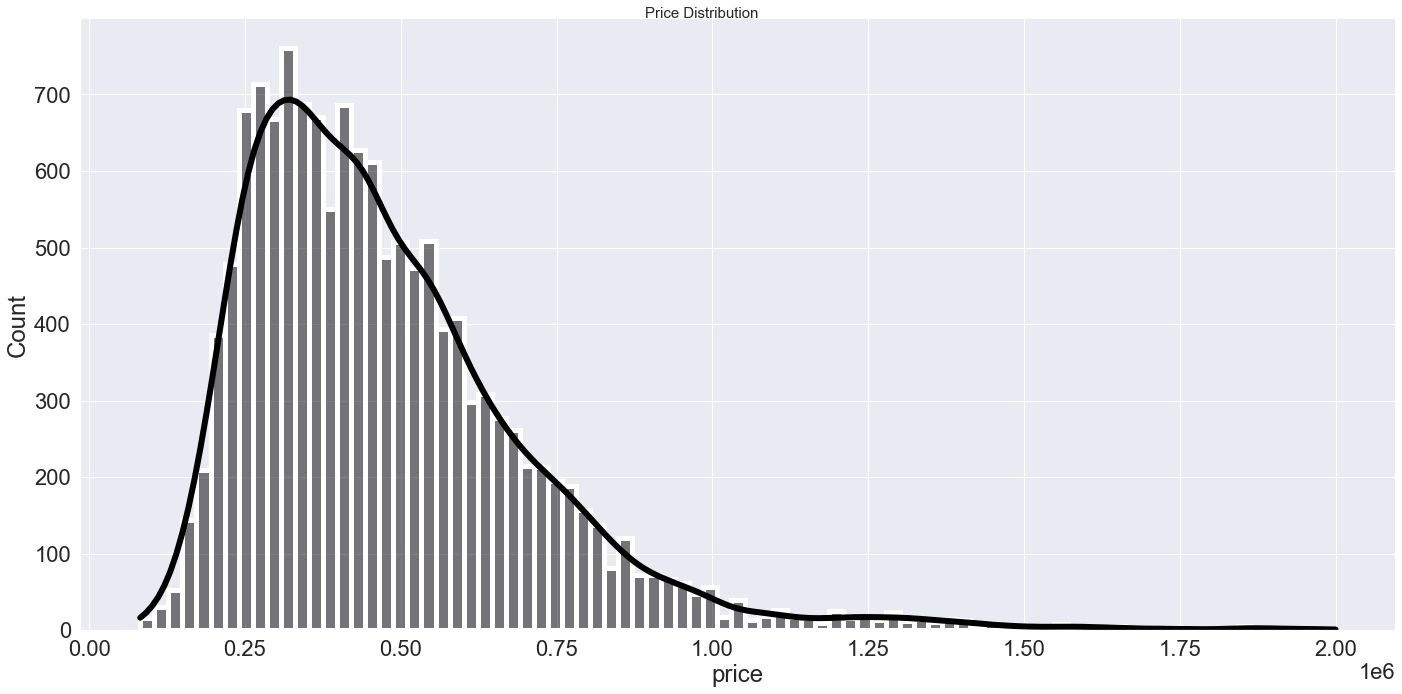

In [90]:
#plotting a histogram showing the continous distibution of the price data.


ax = sns.displot(processed_df['price'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Price Distribution', size = 15);

2. Sqft_lot

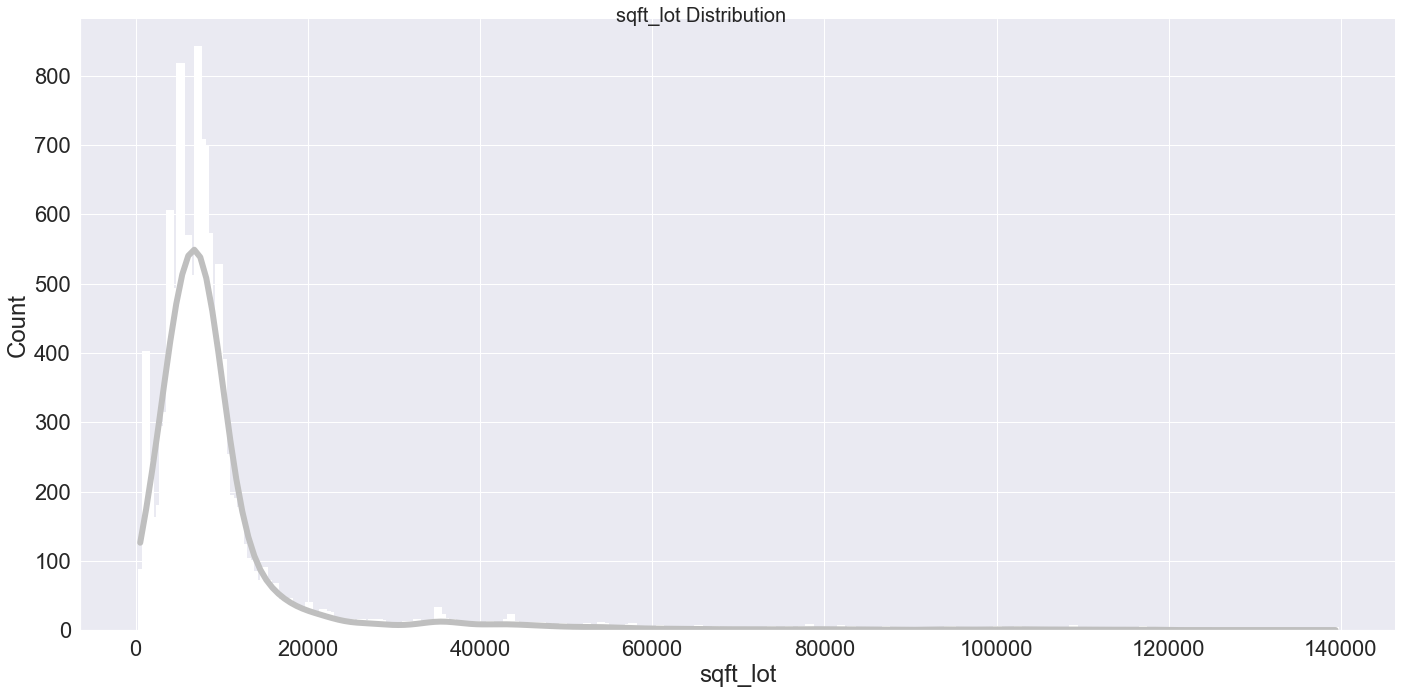

In [91]:
#plotting a histogram showing the continous distibution of the sqft_lot data.

ax = sns.displot(processed_df['sqft_lot'], kde = True, line_kws={'color': 'black', 'lw': 6} , color = "0.75", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_lot Distribution', size = 20) ;

3. Sqft_living

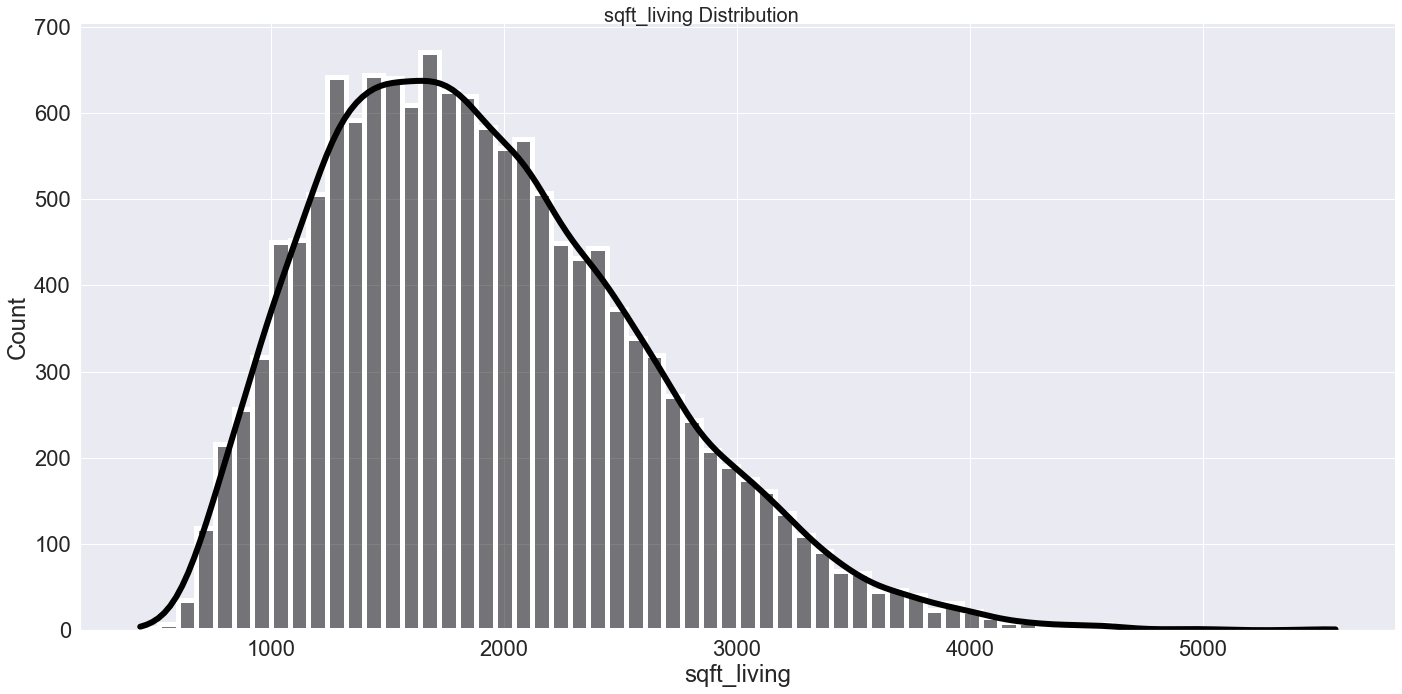

In [92]:
#plotting a histogram showing the continous distibution of the sqft_living data.

ax = sns.displot(processed_df['sqft_living'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_living Distribution', size = 20);

4. Sqft_above

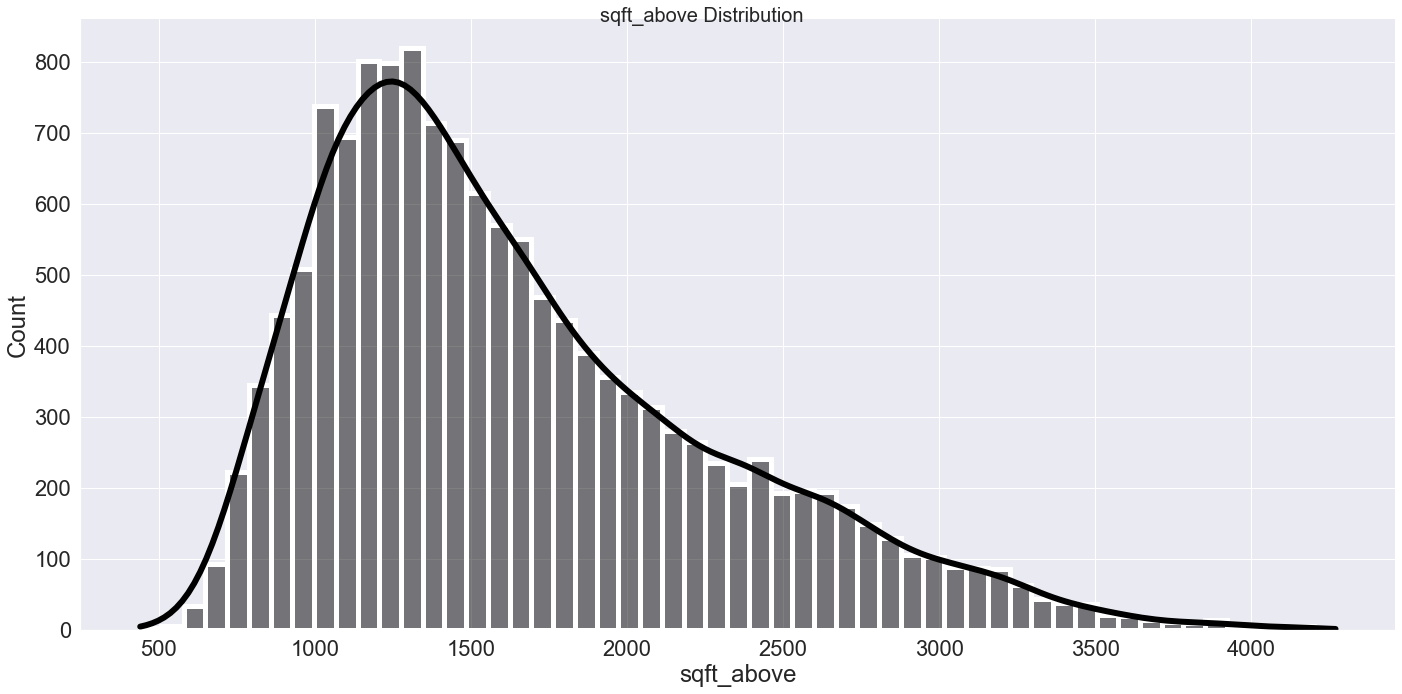

In [93]:
#plotting a histogram showing the continous distibution of the sqft_above data.

ax = sns.displot(processed_df['sqft_above'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_above Distribution', size = 20);

Relationship  between price and each continous numeric  variable

Price vs Sqft_lot

In [94]:
#calculate the average price per sqft_lot

#define function

def price_per_variable(price_mean,x_mean):
    price_per_variable = price_mean.mean()/x_mean.mean()
    return price_per_variable

print('For each sqft_lot the price is', price_per_variable(processed_df.price,processed_df.sqft_lot))



For each sqft_lot the price is 46.66559884757979


Price vs Sqft_living

In [95]:
#calculate the price per sqft_living
print('For each sqft_living the price is', price_per_variable(processed_df.price,processed_df.sqft_living))

For each sqft_living the price is 248.51194127651522


Price vs Sqft_above

In [96]:
#calculate the price per sqft_above
print('For each sqft_above the price is', price_per_variable(processed_df.price,processed_df.sqft_above))

For each sqft_above the price is 289.71020454459824


#### Categorical Data

The categorical data in our analysis is made up of:
1. Bathrooms
2. Bedrooms
3. Grade
4. Condition

1. Bathrooms

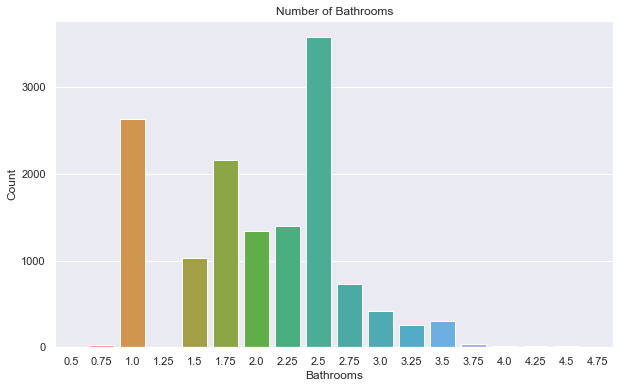

In [119]:
plt.figure(figsize=(10,6))

sns.countplot(x='bathrooms', data= processed_df)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.set(font_scale=2.0)
plt.show()


From the above analysis most houses have 2.5 bathrooms.

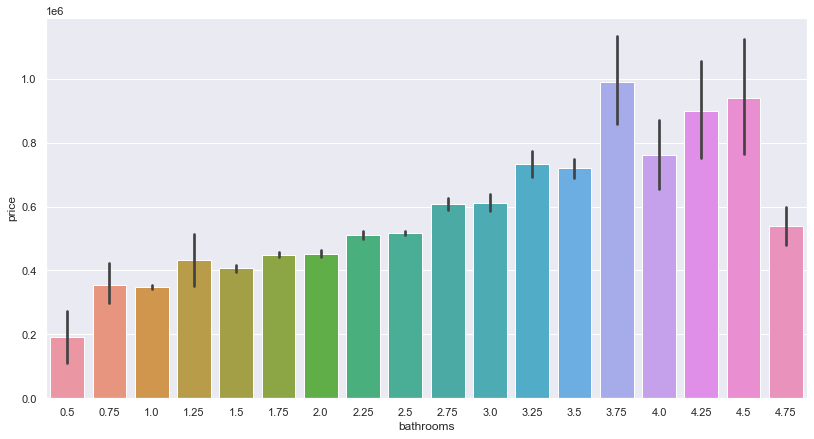

In [98]:
#bathroom vs price
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bathrooms', y='price', data=processed_df)
sns.set(font_scale=1.0)


From this analysis we can see that the houses with more bathrooms had the highest prices

2. Bedrooms

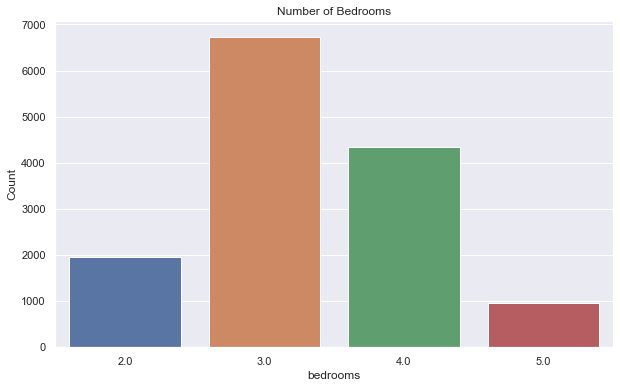

In [99]:
plt.figure(figsize=(10,6))

sns.countplot(x='bedrooms', data= processed_df)
plt.title('Number of Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

From this analysis, most houses had 3 bedrooms

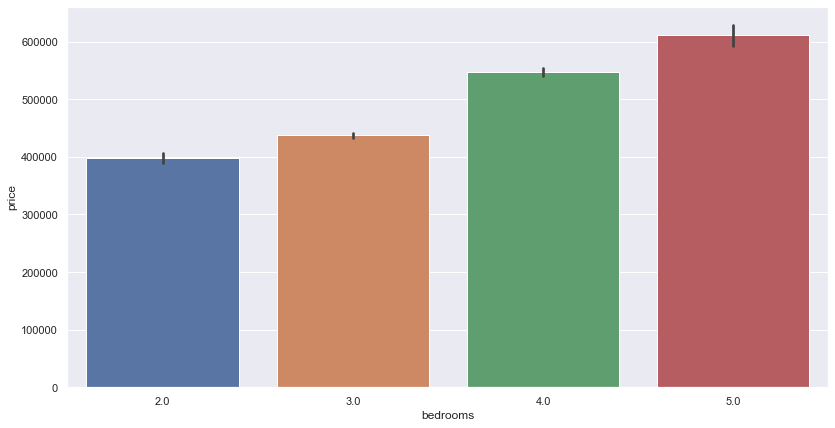

In [100]:
#bedrooms vs price
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bedrooms', y='price', data=processed_df)
sns.set(font_scale=1.0)

From the above analysis the more bedrooms a house has the more expensive it was.

3. Grade

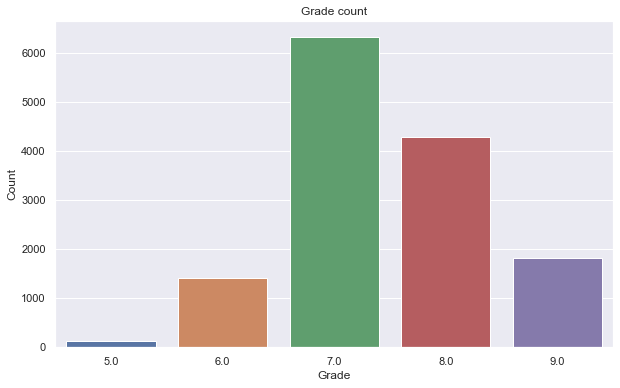

In [101]:
plt.figure(figsize=(10,6))

sns.countplot(x='grade', data= processed_df)
plt.title('Grade count')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

Most houses were designed on a grade of 7

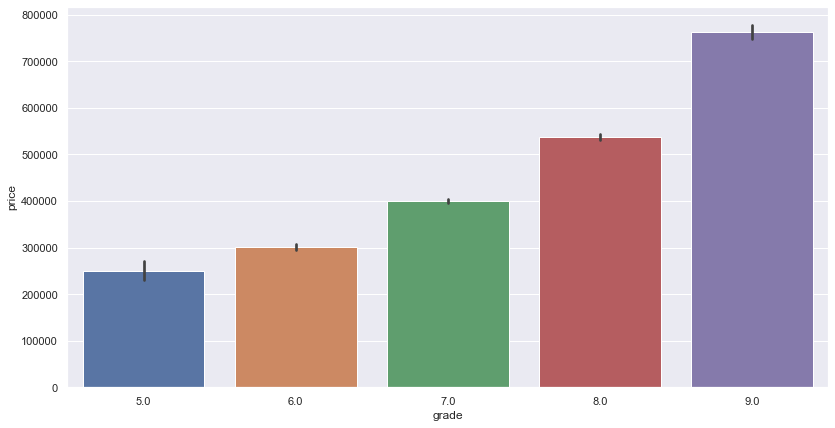

In [102]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='grade', y='price', data=processed_df)
sns.set(font_scale=1.0)

The above analysis concludes that the higher a house grade the higher the price

4. Condition

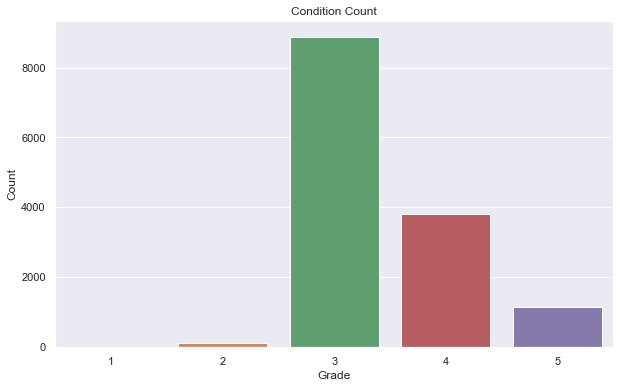

In [103]:
plt.figure(figsize=(10,6))

sns.countplot(x='condition', data= processed_df)
plt.title('Condition Count')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

From the analysis above most houses were of average condition.

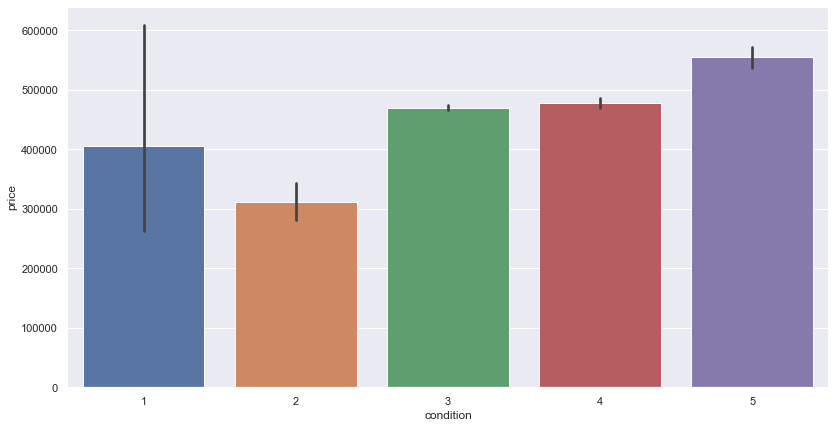

In [104]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='condition', y='price', data=processed_df)
sns.set(font_scale=1.0)

Houses in a very good condition had the highest price according the above analysis.

## Visualization

### Linearity of the variables

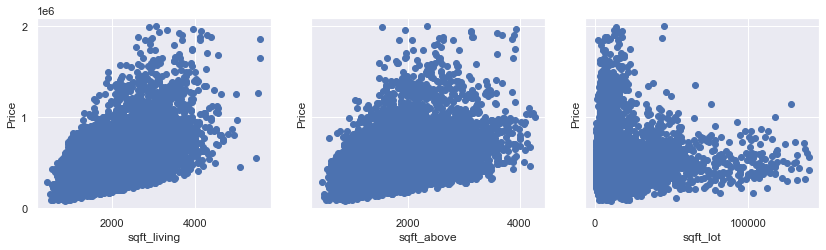

In [105]:
X = processed_df[['sqft_living', 'sqft_above', 'sqft_lot']]
y = processed_df['price']

# Create subplots for each feature
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs = axs.ravel()
sns.set(font_scale=2.0)


# Loop through each feature and create a scatter plot against the target variable
for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show();

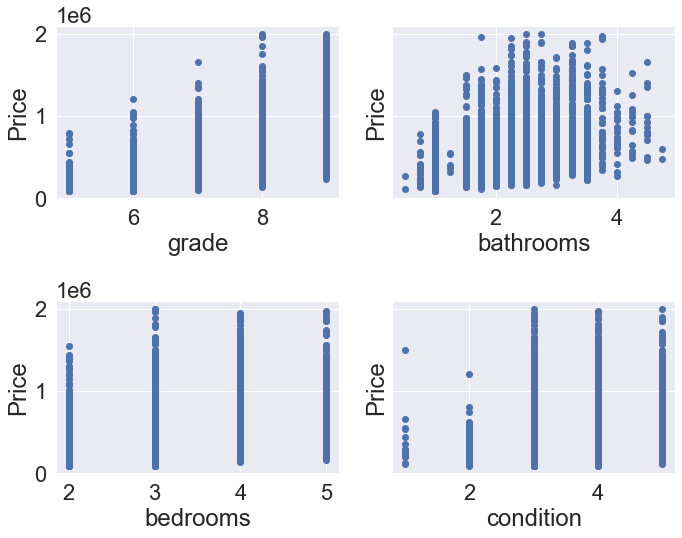

In [106]:
X = processed_df[[ 'grade', 'bathrooms', 'bedrooms', 'condition',]]
y = processed_df['price']

# Create subplots for each feature
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
axs = axs.ravel()
sns.set(font_scale=2.0)

# Loop through each feature and create a scatter plot against the target variable
for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show();

### Correlation between Variables

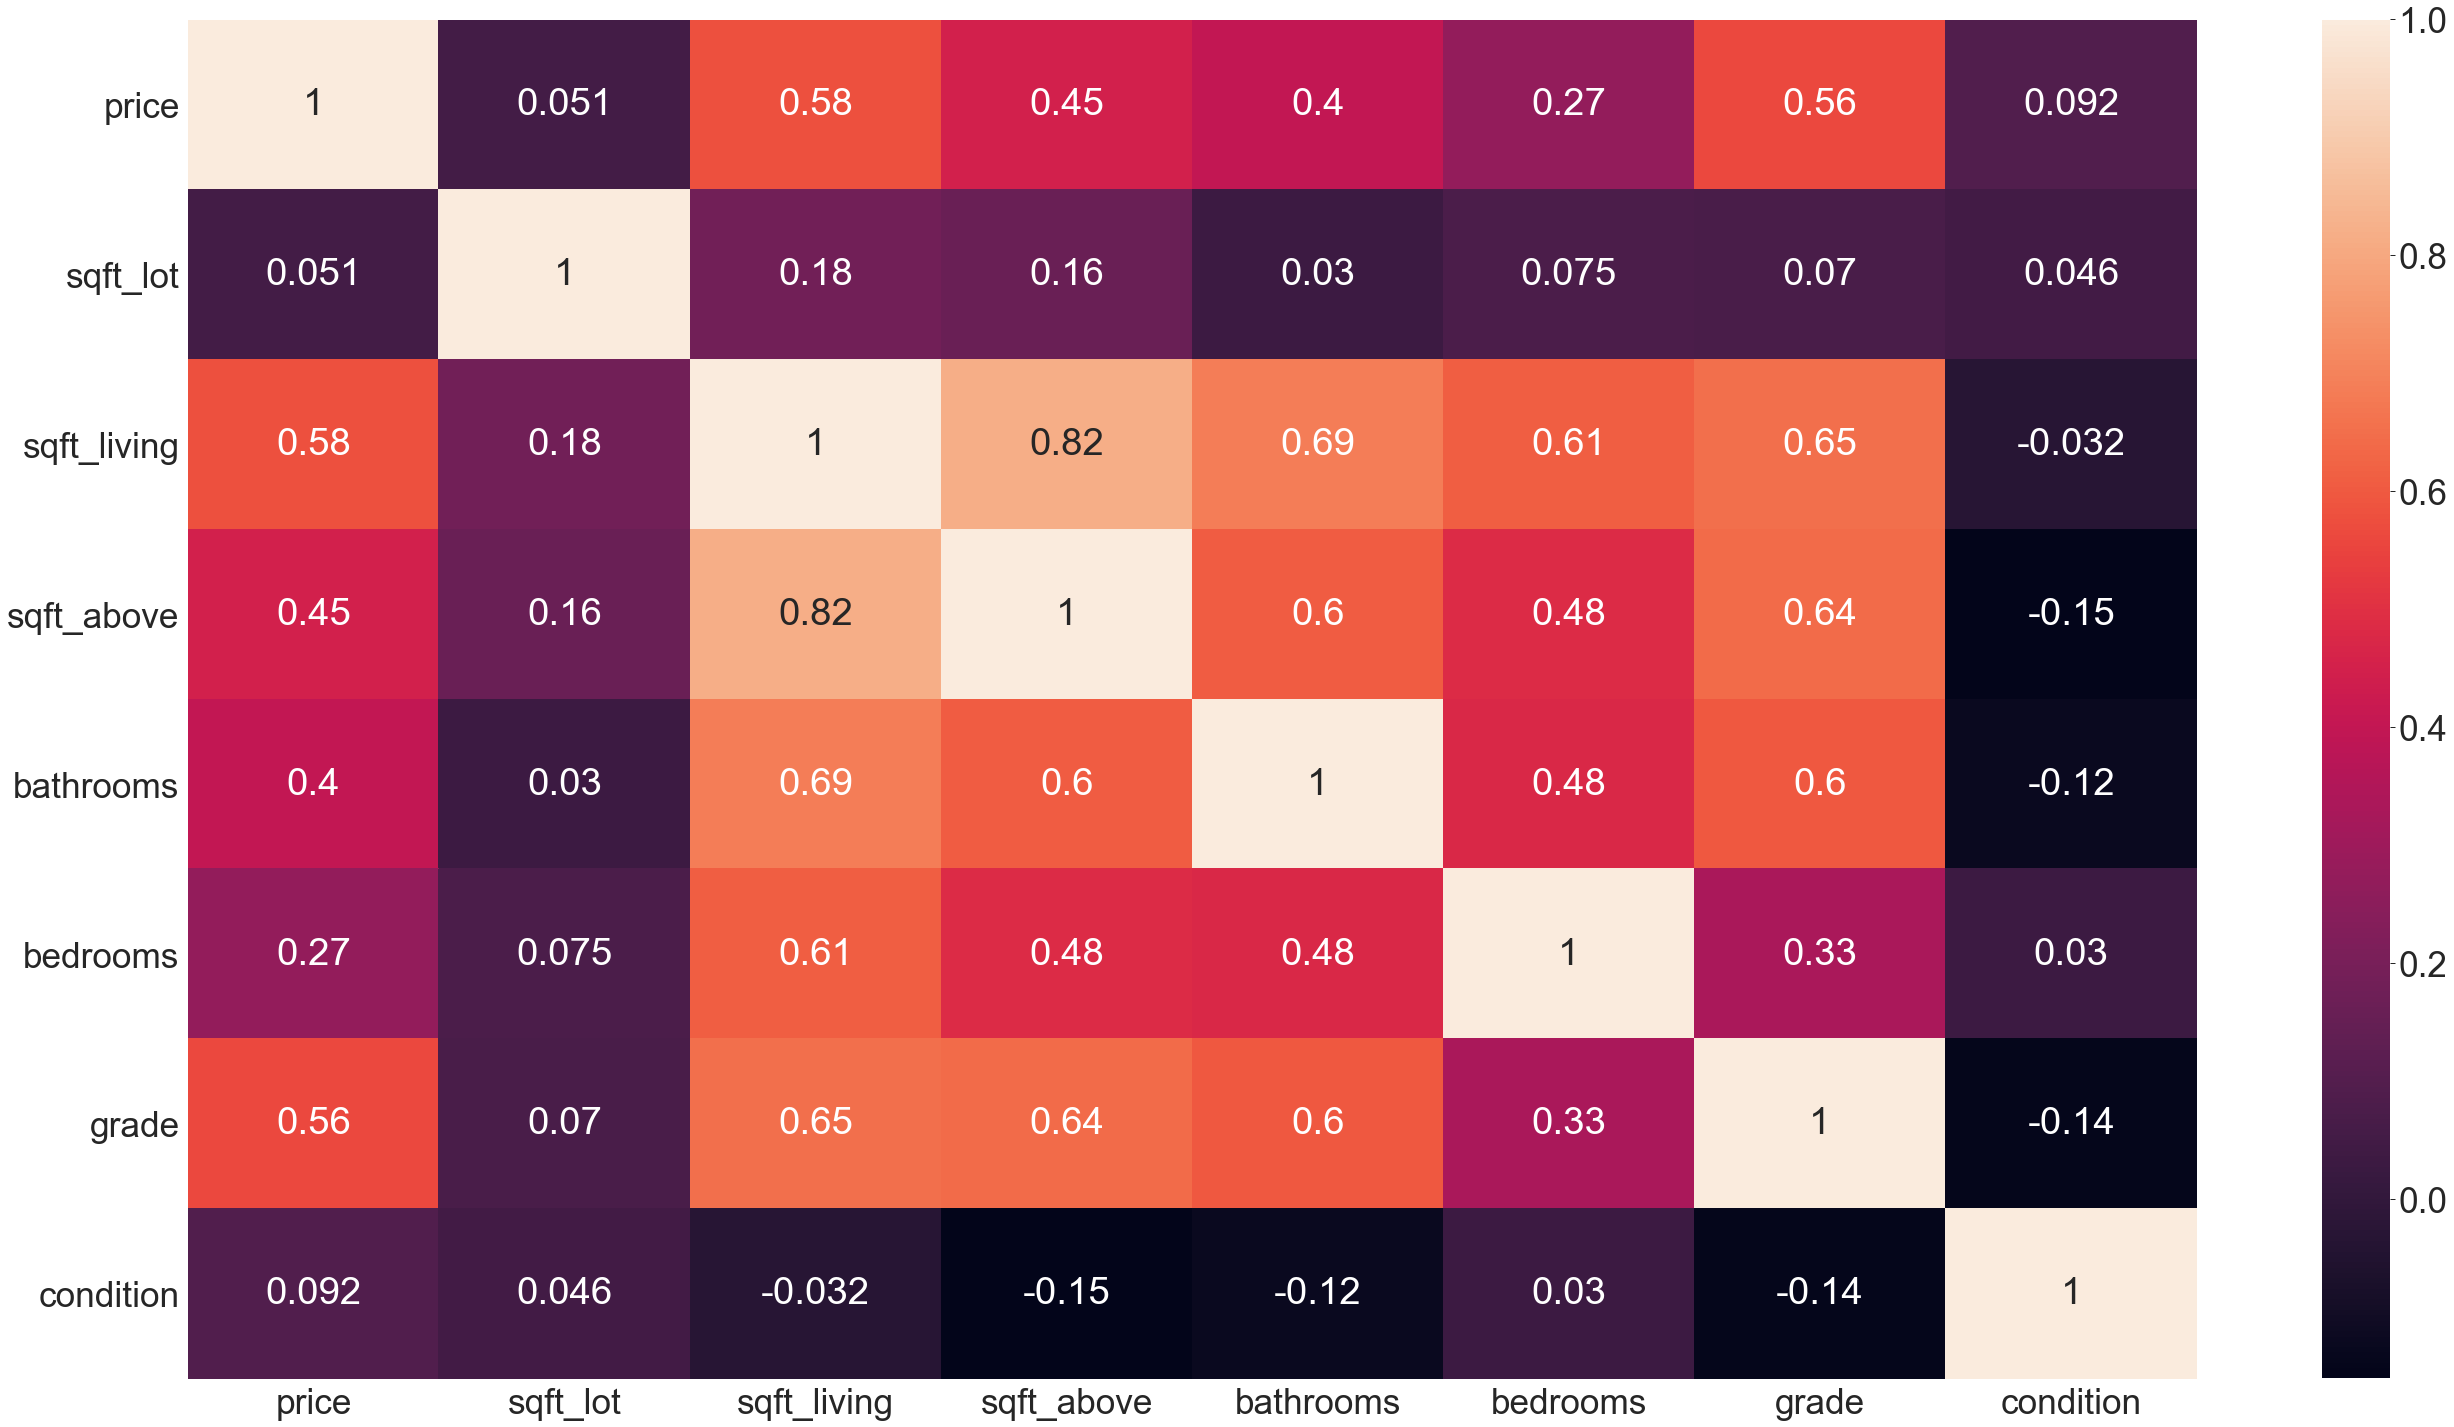

In [107]:
#heatmap to show correlation
plt.figure(figsize=(45 ,25))
sns.set_context("paper",font_scale=4)
sns.heatmap(processed_df.corr(), annot=True)
plt.show()

## Data Modelling

### Baseline Model 
Simple Linear Regression

* Price V Sqft_above 

In [108]:
regression_model_0 = smf.ols('price ~ sqft_above', data = processed_df).fit()
regression_model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3541.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:02:57   Log-Likelihood:            -1.9112e+05
No. Observations:               13987   AIC:                         3.822e+05
Df Residuals:                   13985   BIC:                         3.823e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.081e+05   4860.827     42.806      0.000    1.99e+05    2.18e+05
sqft_above   163.5216      2.748     59.503      0.000     158.135     168.908
==============================================================================
Omnibus:                     4388.261   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16903.501
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                       7.431   Cond. No.                     4.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the model summarry above we can conclude that 
* The model explains about 20% of the variability of price around its mean.

## Mean Absolute Error

In [109]:
mae_0 = regression_model_0.resid.abs().sum() / len(processed_df['price'])
round(mae_0, 2)

154581.33

Our model is off by about $154581.33 in a given prediction. This means that, on average, our house analysis model is making an absolute error of $154581.33 in its predictions. Since we are predicting house value based on prices , this model is significantly making relatively large errors.


* Price V. Sqft_Living

In [110]:
regression_model_1 = smf.ols('price ~ sqft_living', data = processed_df).fit()
regression_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     7032.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:02:57   Log-Likelihood:            -1.8985e+05
No. Observations:               13987   AIC:                         3.797e+05
Df Residuals:                   13985   BIC:                         3.797e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.076e+05   4697.160     22.903      0.000    9.84e+04    1.17e+05
sqft_living   192.5484      2.296     83.854      0.000     188.047     197.049
==============================================================================
Omnibus:                     3780.370   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13652.774
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                       7.045   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the model summarry above we can conclude that 
* The model explains about 30% of the variability of price around its mean.


## Mean Absolute Error 

In [111]:

mae_1 = regression_model_1.resid.abs().sum() / len(processed_df['price'])
round(mae_1, 2)

142318.2

Our model is off by about $142318.20 in a given prediction. This means that, on average, our house analysis model is making an absolute error of $142,318.20 in its predictions.Since we are predicting house value based on prices , this model is also significantly making relatively large errors.

## Multiple Linear Regression 

In [112]:
""" transforming categorical variable grade to be able to incorporate it into our model """

y = processed_df["price"]

X = processed_df[["sqft_lot", "sqft_living","sqft_above","bathrooms","bedrooms", "grade"]]

X = pd.get_dummies(X, columns=["grade"], drop_first=True)

regression_model_2 = sm.OLS(y, sm.add_constant(X))

regression_model_2_results = regression_model_2.fit()

regression_model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1153.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:02:58   Log-Likelihood:            -1.8882e+05
No. Observations:               13987   AIC:                         3.777e+05
Df Residuals:                   13977   BIC:                         3.777e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.116e+05   1.65e+04     12.841      0.000    1.79e+05    2.44e+05
sqft_lot       -0.9023      0.118     -7.625      0.000      -1.134      -0.670
sqft_living   199.6449      4.535     44.024      0.000     190.756     208.534
sqft_above    -78.2058      4.253    -18.389      0.000     -86.542     -69.869
bathrooms   -2.162e+04   3266.625     -6.617      0.000    -2.8e+04   -1.52e+04
bedrooms    -2.138e+04   2429.140     -8.802      0.000   -2.61e+04   -1.66e+04
grade_6.0     2.96e+04   1.61e+04      1.834      0.067   -2028.815    6.12e+04
grade_7.0    7.972e+04   1.57e+04      5.065      0.000    4.89e+04    1.11e+05
grade_8.0    1.714e+05   1.61e+04     10.619      0.000     1.4e+05    2.03e+05
grade_9.0    3.336e+05    1.7e+04     19.639      0.000       3e+05    3.67e+05
==============================================================================
Omnibus:                     3769.546   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15218.415
Skew:                           1.286   Prob(JB):                         0.00
Kurtosis:                       7.416   Cond. No.                     3.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The model explains about 40% of the variability of price around its mean.


## Mean Absolute Error 

In [113]:
mae_2 = regression_model_2_results.resid.abs().sum() / len(processed_df['price'])
round(mae_2, 2)

129493.34

Our model is off by about $129493.34 in a given prediction. This means that, on average, our house analysis model is making an absolute error of $129,493.34 in its predictions. This is better as compared to the previuos models. Our model is slowly getting beter at predictions

Note : We used R squared and Mean Absolue Error as our metrics of success. R squared  measures the proportion of variance in the target variable (house price) that is explained by the predictor  variables in the model. A relatively high R squared  value indicates a good fit between the model and the data. Mean Absolute Error on the other hand is a metric easy to interpret and is less sensitive to outliers than other metrics, it measures the average absolute difference between the predicted and actual values of the house price.Since we are taking the absolute values, all of the errors will be weighted on the same linear scale. Thus, unlike the MSE, we won’t be putting too much weight on our outliers and our loss function provides a generic and even measure of how well our model is performing.

## Conclusion

After analyzing King County data, our final model would suggest the main factors in increasing property value are sqft foot living  of the property as well as its grade. Grade refers to the classification based on construction and design structure . This mainly has to do with the types of materials used and the quality of the work done. Buildings that get better grades often cost more to build per unit of measure however we deem that investment profitable as properties that do grade higher, command higher value. Our model does however have its faults. Our final model R^2 was approximately 42% with an MAE of $129,493.34. Linear regression was probably not the best tool to use to get the most out of this data set so in the future we would like to use different more powerful machine learning tools in order to make this a more accurate predictive model.



## Recommendations
* The real estate agency should explore properties that occupy a large square foot of the land since most people would rather source a relatively large proportion of land 
* As per our Exploratory Analysis we see that houses with good construction and design are likley to be more in demand which in turn generates more revenue from purchasing  and renting, therefore the agency should check on property managers who are investing on the property  architectural design 
* The real estate agency should look into properties with  3 or more bedrooms since more people are likely to occupy them